The path length is: 315


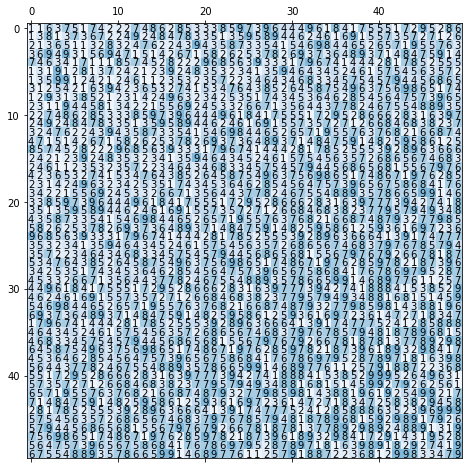

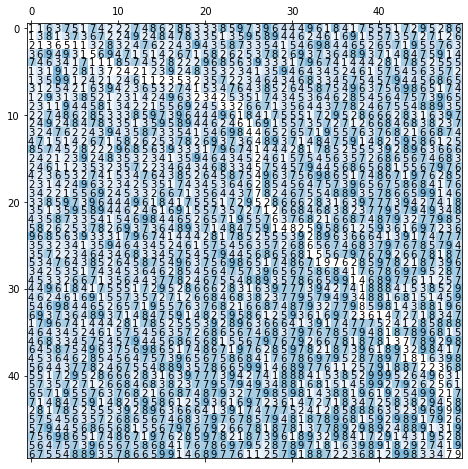

In [18]:
import numpy as np
import matplotlib.pyplot as plt

input_file = open('input', 'r')
lines = input_file.readlines()

coords = []

for line in lines:
    coords.append(list(line.rstrip("\n")))

original_length = len(coords)

for i in range(4):
  for y in range(original_length):
    for x in range(original_length):
      if ((int(coords[y][x]) + 1 + i) % 9 != 0):
        coords[y].append(str((int(coords[y][x]) + 1 + i) % 9))
      else:
        coords[y].append('9')

for i in range(4):
  for y in range(original_length):
    n = []
    for x in range(len(coords[y])):
      if((int(coords[y][x]) + 1 + i) % 9 != 0):
        n.append(str((int(coords[y][x]) + 1 + i) % 9))
      else:
        n.append('9') 
    coords.append(n)

min_val, max_val = 0, len(coords[0])

map = np.array(coords, dtype=int)

fig, ax = plt.subplots(figsize=(8,8))
ax.matshow(map, cmap=plt.cm.Blues, vmin=0, vmax=20)
for i in range(max_val):
    for j in range(max_val):
      c = map[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

#Initialize auxiliary arrays
distmap=np.ones((max_val,max_val),dtype=int)*np.Infinity
distmap[0,0]=0
originmap=np.ones((max_val,max_val),dtype=int)*np.nan
visited=np.zeros((max_val,max_val),dtype=bool)
finished = False
x,y=int(0),int(0)
count=0

#Loop Dijkstra until reaching the target cell
while not finished:
  # move to x+1,y
  if x < max_val-1:
    if distmap[x+1,y]>map[x+1,y]+distmap[x,y] and not visited[x+1,y]:
      distmap[x+1,y]=map[x+1,y]+distmap[x,y]
      originmap[x+1,y]=np.ravel_multi_index([x,y], (max_val,max_val))
  # move to x-1,y
  if x>0:
    if distmap[x-1,y]>map[x-1,y]+distmap[x,y] and not visited[x-1,y]:
      distmap[x-1,y]=map[x-1,y]+distmap[x,y]
      originmap[x-1,y]=np.ravel_multi_index([x,y], (max_val,max_val))
  # move to x,y+1
  if y < max_val-1:
    if distmap[x,y+1]>map[x,y+1]+distmap[x,y] and not visited[x,y+1]:
      distmap[x,y+1]=map[x,y+1]+distmap[x,y]
      originmap[x,y+1]=np.ravel_multi_index([x,y], (max_val,max_val))
  # move to x,y-1
  if y>0:
    if distmap[x,y-1]>map[x,y-1]+distmap[x,y] and not visited[x,y-1]:
      distmap[x,y-1]=map[x,y-1]+distmap[x,y]
      originmap[x,y-1]=np.ravel_multi_index([x,y], (max_val,max_val))

  visited[x,y]=True
  dismaptemp=distmap
  dismaptemp[np.where(visited)]=np.Infinity
  # now we find the shortest path so far
  minpost=np.unravel_index(np.argmin(dismaptemp),np.shape(dismaptemp))
  x,y=minpost[0],minpost[1]
  if x==max_val-1 and y==max_val-1:
    finished=True
  count=count+1

#Start backtracking to plot the path  
mattemp=map.astype(float)
x,y=max_val-1,max_val-1
path=[]
mattemp[int(x),int(y)]=np.nan

while x>0.0 or y>0.0:
  path.append([int(x),int(y)])
  xxyy=np.unravel_index(int(originmap[int(x),int(y)]), (max_val,max_val))
  x,y=xxyy[0],xxyy[1]
  mattemp[int(x),int(y)]=np.nan
path.append([int(x),int(y)])

#Output and visualization of the path
current_cmap = plt.cm.get_cmap("Blues").copy()
current_cmap.set_bad(color='red')
fig, ax = plt.subplots(figsize=(8,8))
ax.matshow(mattemp,cmap=plt.cm.Blues, vmin=0, vmax=20)
for i in range(max_val):
    for j in range(max_val):
      c = map[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

print('The path length is: '+str(int(distmap[max_val-1,max_val-1])))